In [136]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from scipy.integrate import odeint

In [104]:
n_v = 100
corr_len = 10
integration_time = 500
learning_rate = 0.01

In [105]:
weights = 0.1*np.random.randn(integration_time+1,n_v)
#print weights

In [106]:
temp = 0
for t in range(integration_time):
    for i in range(n_v):
        for j in range(n_v):
            temp += weights[t,j]*np.exp(-abs((j-i)*1.0/corr_len))
        weights[t+1,i] = weights[t,i] + (temp)*learning_rate - 0.8*weights[t,i]
        temp = 0

KeyboardInterrupt: 

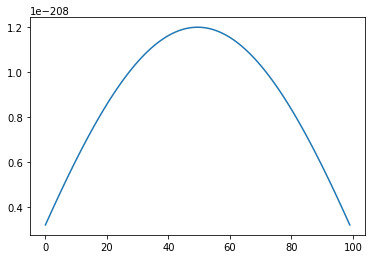

In [64]:
plt.plot(weights[500])

### Next order terms without 4 point correlator:

In [129]:
n_v = 100
corr_len = 3
integration_time = 1500
learning_rate = 10E-5

weights = 0.1*np.random.randn(integration_time+1,n_v) + 20*norm.pdf(x=np.linspace(0,99,100),loc=30,scale=5)
#print weights

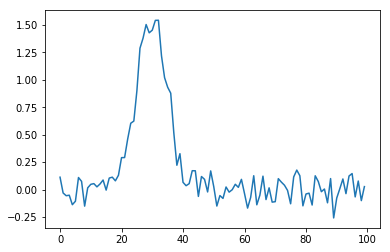

In [130]:
plt.plot(weights[0])

In [131]:
temp = 0
for t in range(integration_time):
    for i in range(n_v):
        for j in range(n_v):
            temp += (weights[t,j]*(1-(np.sum(weights[t,:]**2))/3) - (weights[t,j]**3)/3)*np.exp(-abs((j-i)*1.0/corr_len))
        weights[t+1,i] = weights[t,i] + (temp-weights[t,i]+(weights[t,i]**3)/3)*learning_rate
        temp = 0

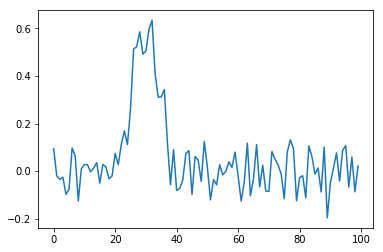

In [132]:
plt.plot(weights[-1])

## USE ODE INTEGRATOR

In [181]:
def order3(y,t,corr_len):
    dydt = np.zeros(len(y))
    temp = 0
    for i in range(len(y)):
        for j in range(len(y)):
            temp += y[j]*((1-(np.sum(y[:]**2))/3) - (y[j]**3)/3)*np.exp((-min(abs(j-i),(len(y)-abs(j-i))))*1.0/corr_len)
        dydt[i] = (temp - y[i] + (y[i]**3)/3)
        temp=0
    return dydt

In [192]:
#init_cond = 40*norm.pdf(x=np.linspace(0,99,100),loc=75,scale=5)
#init_cond = 0.1*np.random.randn(n_v)
init_cond = 1*np.sin(np.linspace(0,99,100)) + 0.1*np.random.randn(n_v)
time_int = np.linspace(0,200,10)
sol = odeint(order3, init_cond, time_int, args=(corr_len,))

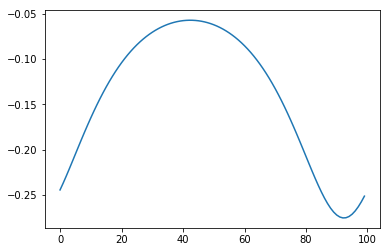

In [193]:
plt.plot(sol[-1,:])